
## Task 1: Prediction using Supervised Machine Learning!
## GRIP @ The Sparks Foundation

### Target : Predict the pourcentage of a student based on the no. of study hours.

###  Author : Zeineb REJEB


### Importing Librairies and Dataset

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:

url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


### Exploring Data

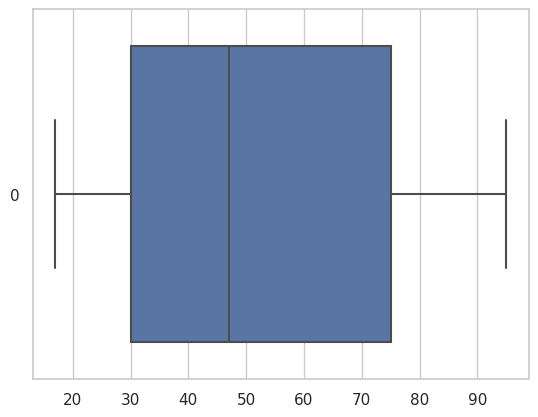

In [8]:
sns.set(style='whitegrid')
ax = sns.boxplot(data = data['Scores'], orient = 'h')

Text(0, 0.5, 'Hours')

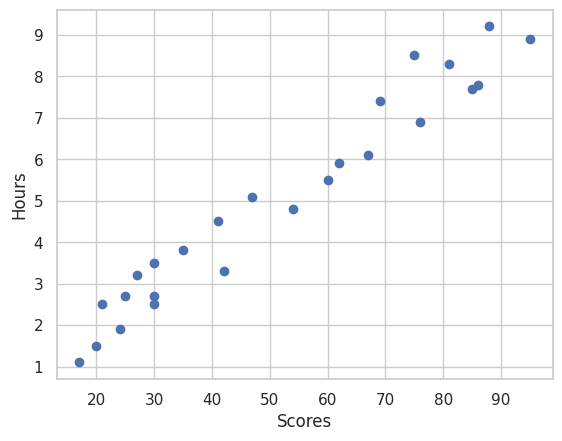

In [9]:

plt.scatter(x=data['Scores'],y=data['Hours'])
plt.xlabel('Scores')
plt.ylabel('Hours')

### Train & Test Split

In [10]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [11]:
type(X)

numpy.ndarray

In [12]:
type(y)

numpy.ndarray

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
X_train.shape

(20, 1)

In [15]:
X_test.shape

(5, 1)

In [16]:
y.mean()

51.48

### Model Training

In [17]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print("Training complete.")

Training complete.


### Visualizing the Model

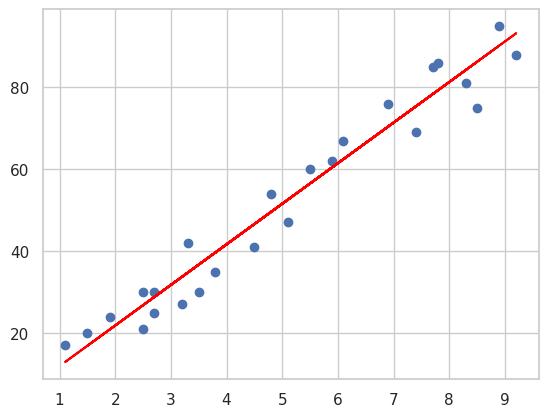

In [18]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, y)
plt.plot(X, line,color='red')
plt.show()

### Making predictions

In [19]:
# Predicting the scores
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual (%)': y_test, 'Predicted (%)': y_pred})
df

,Actual (%),Predicted (%)
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
hours = 9.25
model_pred = regressor.predict([[hours]])
print(f"If a student studies for {hours} hrs/ day, his score will be {model_pred[0]}%")

If a student studies for 9.25 hrs/ day, his score will be 93.69173248737539%


###Evaluating the model

In [21]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


#Thank you!